
## STEP 1: Install & Import Libraries


In [1]:
# Install missing libraries (only runs if needed)
!pip install scikit-learn pandas numpy matplotlib seaborn --quiet

In [46]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building & evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reproducibility
import random
random.seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!



## STEP 2: Upload & Load Dataset


In [47]:
# Colab me file upload karne ka prompt
from google.colab import files
uploaded = files.upload()  # upload emoji_dataset_expanded.csv (or your CSV)

Saving emoji_dataset_1000_plus.csv to emoji_dataset_1000_plus.csv


In [48]:
# Uploaded file ka naam lena
csv_name = list(uploaded.keys())[0]
print("📂 Uploaded:", csv_name)

📂 Uploaded: emoji_dataset_1000_plus.csv


In [49]:
# Dataset load karna
df = pd.read_csv(csv_name)

In [50]:
# First few rows dekhna
print("\n📊 First 5 rows:")
print(df.head())


📊 First 5 rows:
                             sentence emoji  label
0         Really, Food makes me happy     😋      8
1          Such a tasty treat all day     😋      8
2             Really, You made my day     😂      2
3             Yawning all day so much     😴      1
4  I feel like this is pure happiness    ❤️      0


In [51]:
# Basic info
print("\nℹ️ Dataset info:")
print(df.info())


ℹ️ Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   emoji     1000 non-null   object
 2   label     1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None


In [52]:
# Class balance check
print("\n⚖️ Emoji count per class:")
print(df['emoji'].value_counts())


⚖️ Emoji count per class:
emoji
😋     100
😂     100
😴     100
❤️    100
😡     100
😢     100
🤔     100
🎉     100
😱     100
😎     100
Name: count, dtype: int64




## STEP 3: Preprocessing + Class Balance Visualization



In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Text clean function (basic)
def clean_text(text):
    text = str(text).lower().strip()
    return text

In [55]:
# Apply cleaning
df['sentence'] = df['sentence'].apply(clean_text)

In [56]:
# Label encoding emojis
le = LabelEncoder()
df['label'] = le.fit_transform(df['emoji'])

/tmp/ipython-input-2711175434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


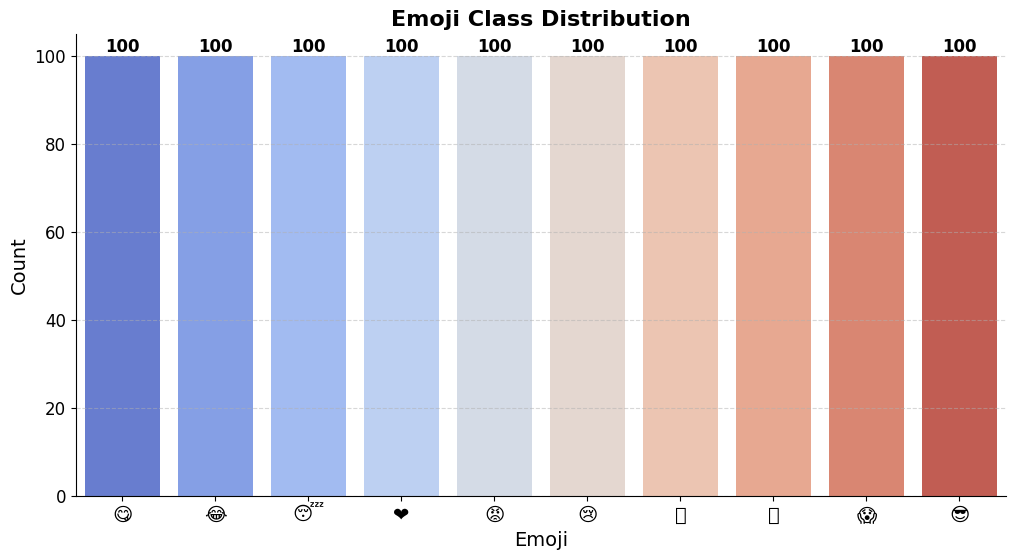

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class balance plot (better version)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=df['emoji'].value_counts().index,
    y=df['emoji'].value_counts().values,
    palette="coolwarm"
)

# Title & labels
plt.title("Emoji Class Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Emoji", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, color='black', fontweight='bold'
    )

# Style adjustments
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text_advanced(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['sentence'] = df['sentence'].apply(clean_text_advanced)


## Step 4: Train-test split and TF-IDF vectorization


In [61]:
# Step 3: Data cleaning and label encoding (agar pehle nahi kiya)

# Step 4: Train-test split on unique sentences to avoid overlap
unique_sentences = df['sentence'].unique()
train_sentences, test_sentences = train_test_split(unique_sentences, test_size=0.2, random_state=42)

train_df = df[df['sentence'].isin(train_sentences)]
test_df = df[df['sentence'].isin(test_sentences)]

print("Train set size:", train_df.shape)
print("Test set size:", test_df.shape)

# Vectorize text
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_train_tfidf = vectorizer.fit_transform(train_df['sentence'])
X_test_tfidf = vectorizer.transform(test_df['sentence'])

# Labels
y_train = train_df['label']
y_test = test_df['label']

# Optional: Check unique sentences after split
train_unique_df = train_df.drop_duplicates(subset=['sentence'])
test_unique_df = test_df.drop_duplicates(subset=['sentence'])
print("Train set after removing duplicates:", train_unique_df.shape)
print("Test set after removing duplicates:", test_unique_df.shape)

Train set size: (801, 3)
Test set size: (199, 3)
Train set after removing duplicates: (548, 3)
Test set after removing duplicates: (138, 3)



## Step 5: Train the Emoji Prediction Model


In [62]:
from sklearn.linear_model import LogisticRegression

# Model initialization
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Train the model
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

print("Model training complete ✅")

Model training complete ✅


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



## Step 6: Model Evaluation


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_reg = LogisticRegression(max_iter=1000, solver='lbfgs', C=0.1, multi_class='multinomial')
model_reg.fit(X_train_tfidf, y_train)
y_pred_reg = model_reg.predict(X_test_tfidf)

print(f"Regularized Model Accuracy: {accuracy_score(y_test, y_pred_reg):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_reg, target_names=le.classes_))

Regularized Model Accuracy: 86.43%

Classification Report:
              precision    recall  f1-score   support

          ❤️       1.00      0.68      0.81        34
           🎉       0.92      0.86      0.89        14
           😂       0.85      1.00      0.92        17
           😋       0.89      0.89      0.89        18
           😎       1.00      0.97      0.98        29
           😡       0.65      0.83      0.73        18
           😢       0.64      1.00      0.78        14
           😱       0.81      1.00      0.89        17
           😴       0.94      1.00      0.97        16
           🤔       1.00      0.64      0.78        22

    accuracy                           0.86       199
   macro avg       0.87      0.89      0.86       199
weighted avg       0.89      0.86      0.86       199



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

model_cv = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), min_df=2),
    LogisticRegression(max_iter=1000, solver='lbfgs', C=0.1, multi_class='multinomial')
)

scores = cross_val_score(model_cv, df['sentence'], le.transform(df['emoji']), cv=5, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation accuracies: [0.955 0.965 0.96  0.94  0.955]
Mean CV accuracy: 0.9549999999999998


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [65]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'), param_grid=params, cv=5)
grid.fit(X_train_tfidf, y_train)

print("Best C:", grid.best_params_)
print("Best CV score:", grid.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best C: {'C': 100}
Best CV score: 0.9850388198757762


## Step 7: Confusion Matrix

In [66]:
# Features and Labels
X = df['sentence']          # input text
y = df['emoji']             # target emoji

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [69]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


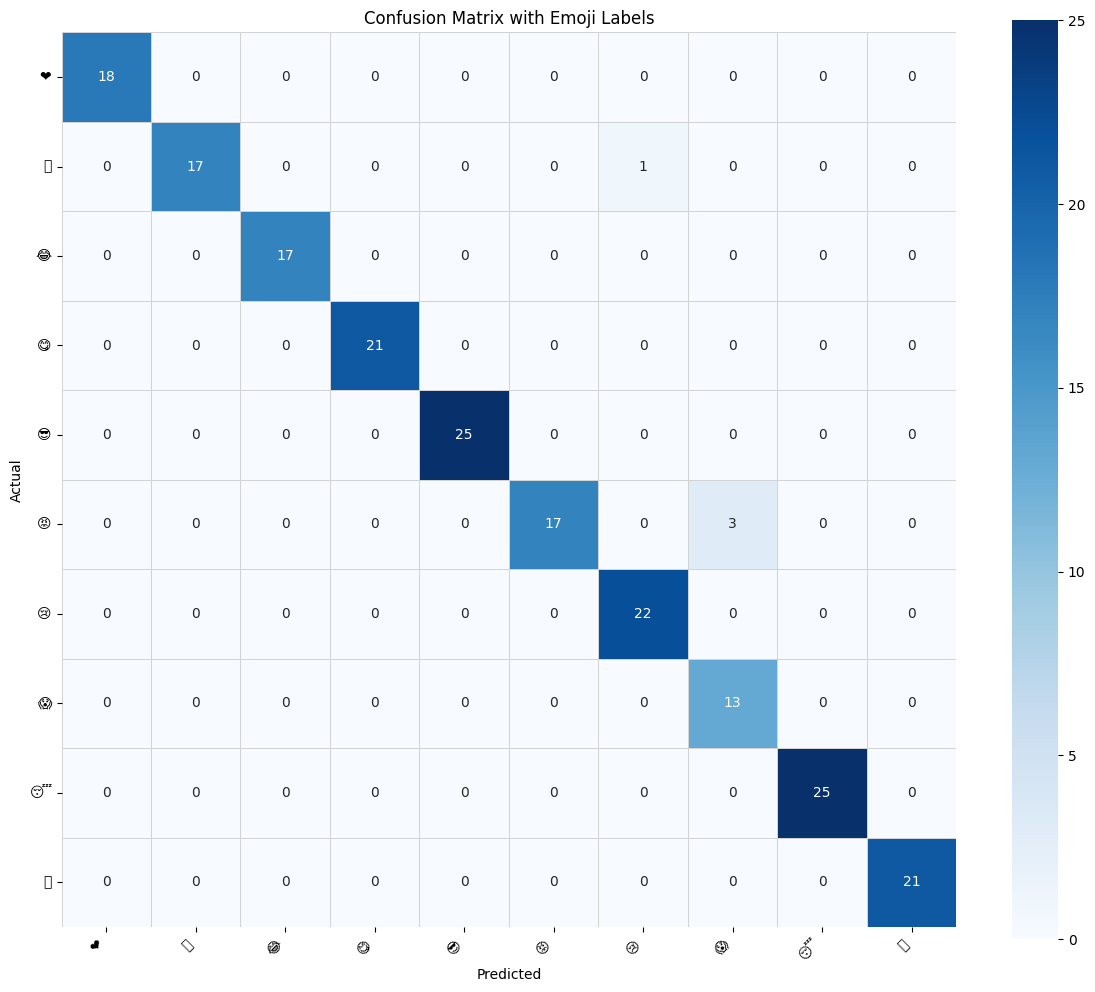

In [71]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_final = model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            square=True, linewidths=0.5, linecolor='lightgray')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Emoji Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
common_sentences = set(train_df['sentence']).intersection(set(test_df['sentence']))
print("Common sentences in train and test:", len(common_sentences))

Common sentences in train and test: 0


In [73]:
print("Train size:", train_df.shape)
print("Test size:", test_df.shape)
print("Unique train sentences:", train_df['sentence'].nunique())
print("Unique test sentences:", test_df['sentence'].nunique())

Train size: (801, 3)
Test size: (199, 3)
Unique train sentences: 548
Unique test sentences: 138


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Example: X = df['sentence'], y = df['emoji_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vectorize AFTER splitting
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model_reg = LogisticRegression(max_iter=1000)
model_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [80]:
import numpy as np

# Pick at most 5 samples (if dataset smaller, adjust automatically)
sample_size = min(5, X_test.shape[0])
sample_indices = np.random.choice(X_test.shape[0], size=sample_size, replace=False)

for idx in sample_indices:
    # Get sentence from X_test
    sentence = X_test[idx] if isinstance(X_test, np.ndarray) else X_test.iloc[idx]

    # Actual emoji (y_test is NumPy array or Series)
    actual_emoji = le.inverse_transform([y_test[idx]])[0]

    # Vectorize sentence
    vect_sentence = vectorizer.transform([sentence])

    # Predict emoji
    pred_emoji = le.inverse_transform(model_reg.predict(vect_sentence))[0]

    # Print result
    print(f"Sentence: {sentence}")
    print(f"Actual Emoji: {actual_emoji}")
    print(f"Predicted Emoji: {pred_emoji}")
    print("-" * 50)

Sentence: wow time pop champagn
Actual Emoji: 🎉
Predicted Emoji: 🎉
--------------------------------------------------
Sentence: absolut let parti tonight
Actual Emoji: 🎉
Predicted Emoji: 🎉
--------------------------------------------------
Sentence: absolut ponder idea
Actual Emoji: 🤔
Predicted Emoji: 🤔
--------------------------------------------------
Sentence: cant stand anymor much
Actual Emoji: 😡
Predicted Emoji: 😡
--------------------------------------------------
Sentence: feel like heart broken
Actual Emoji: 😢
Predicted Emoji: 😢
--------------------------------------------------


In [77]:
print("Total classes:", len(le.classes_))
print("All classes:", le.classes_)


Total classes: 10
All classes: ['❤️' '🎉' '😂' '😋' '😎' '😡' '😢' '😱' '😴' '🤔']



## Step 8: Model Prediction Test


In [83]:
import numpy as np

# Pick at most 5 samples
sample_size = min(5, X_test.shape[0])
sample_indices = np.random.choice(X_test.shape[0], size=sample_size, replace=False)

for idx in sample_indices:
    # Get sentence
    sentence = X_test[idx] if isinstance(X_test, np.ndarray) else X_test.iloc[idx]

    # Actual emoji
    actual_emoji = le.inverse_transform([y_test[idx]])[0]

    # Vectorize sentence
    vect_sentence = vectorizer.transform([sentence])

    # Predict emoji
    pred_emoji = le.inverse_transform(model_reg.predict(vect_sentence))[0]

    # Print results
    print(f"Sentence: {sentence}")
    print(f"Actual Emoji: {actual_emoji}")
    print(f"Predicted Emoji: {pred_emoji}")
    print("-" * 40)


Sentence: im deep thought much
Actual Emoji: 🤔
Predicted Emoji: 🤔
----------------------------------------
Sentence: eye close today
Actual Emoji: 😴
Predicted Emoji: 😴
----------------------------------------
Sentence: parti night long today
Actual Emoji: 🎉
Predicted Emoji: 🎉
----------------------------------------
Sentence: yummi food
Actual Emoji: 😋
Predicted Emoji: 😋
----------------------------------------
Sentence: made day today
Actual Emoji: 😂
Predicted Emoji: 😂
----------------------------------------


In [84]:
sample_df = df.sample(5, random_state=42)  # Random 5 sentences

for idx, row in sample_df.iterrows():
    sentence = row['sentence']
    actual = row['emoji']

    cleaned = sentence.lower()
    vec = vectorizer.transform([cleaned])
    pred = model_reg.predict(vec)[0]    # <-- yahan model_reg use karen
    pred_emoji = le.inverse_transform([pred])[0]

    print(f"Sentence: {sentence}")
    print(f"Actual Emoji: {actual}")
    print(f"Predicted Emoji: {pred_emoji}")
    print("-" * 40)

Sentence: best food ever today
Actual Emoji: 😋
Predicted Emoji: 😋
----------------------------------------
Sentence: im angri right day
Actual Emoji: 😡
Predicted Emoji: 😡
----------------------------------------
Sentence: im sure much
Actual Emoji: 🤔
Predicted Emoji: 🤔
----------------------------------------
Sentence: im terrifi
Actual Emoji: 😱
Predicted Emoji: 😱
----------------------------------------
Sentence: lol that hilari day
Actual Emoji: 😂
Predicted Emoji: 😂
----------------------------------------



## Step 9: Real-Time User Input Prediction with Probability Chart


Enter a sentence: happy birthday

Sentence: happy birthday
Predicted Emoji: 1

🎉 : 58.51 %
😡 : 7.08 %
🤔 : 6.03 %
😱 : 5.56 %
😴 : 5.28 %
😋 : 4.56 %
😢 : 3.95 %
😂 : 3.77 %
😎 : 3.62 %
❤️ : 1.65 %


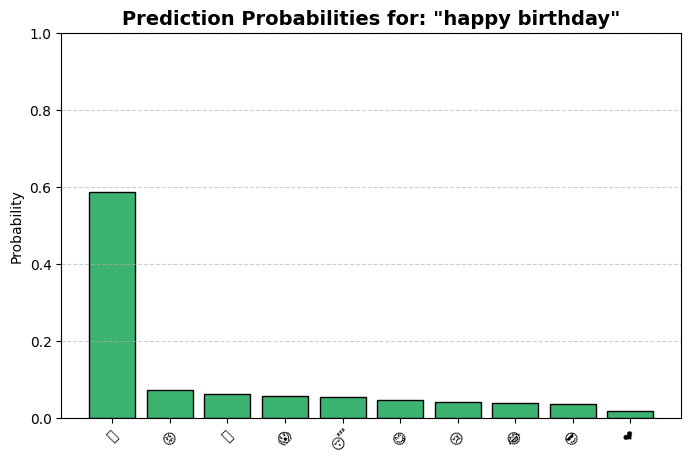

In [86]:
# User input
user_sentence = input("Enter a sentence: ")

# Preprocess & vectorize
cleaned = user_sentence.lower()
vec = vectorizer.transform([cleaned])

# Predict
pred_label = model.predict(vec)[0]
probs = model.predict_proba(vec)[0]

# Map emojis with probabilities
emoji_probs = dict(zip(le.classes_, probs))
emoji_probs = dict(sorted(emoji_probs.items(), key=lambda x: x[1], reverse=True))

# Print prediction
print(f"\nSentence: {user_sentence}")
print(f"Predicted Emoji: {pred_label}\n")

# Print all probabilities
for emoji, prob in emoji_probs.items():
    print(f"{emoji} : {prob*100:.2f} %")

# Plot probability bar chart
plt.figure(figsize=(8,5))
plt.bar(emoji_probs.keys(), emoji_probs.values(), color="mediumseagreen", edgecolor="black")
plt.title(f"Prediction Probabilities for: \"{user_sentence}\"", fontsize=14, fontweight='bold')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Step 10: Model Save & Load


In [87]:
import joblib

# Save model
joblib.dump(model_reg, "emoji_model.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Save label encoder
joblib.dump(le, "label_encoder.pkl")

print("Model, vectorizer, and label encoder saved successfully.")

Model, vectorizer, and label encoder saved successfully.


In [88]:
import joblib

# Load model
model_reg = joblib.load("emoji_model.pkl")

# Load vectorizer
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Load label encoder
le = joblib.load("label_encoder.pkl")

print("Model, vectorizer, and label encoder loaded successfully.")

Model, vectorizer, and label encoder loaded successfully.


In [90]:
# Example sentence
sentence = "I am so angry"

# Transform
vect_sentence = vectorizer.transform([sentence])

# Predict
pred_emoji = le.inverse_transform(model_reg.predict(vect_sentence))[0]
print(f"Predicted Emoji: {pred_emoji}")

Predicted Emoji: 😡


**file download in colab**

In [92]:
from google.colab import files

# Make sure file names match the ones you used in joblib.dump()
files.download("emoji_model.pkl")
files.download("tfidf_vectorizer.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>